In [16]:
from tbi.segmentation import segmentation
from tbi.label_geometry_measures import label_geometry_measures
from tbi.image_intensity_stat_jac import image_intensity_stat_jac
from tbi.skull_strip import skull_strip
from tbi.preprocessing import preprocessing

from glob import glob
from nilearn.plotting import plot_img
import nilearn.plotting as plotting
import pandas as pd
from os.path import join
from IPython.display import display

In [17]:
output = '/data/illustration/py-out3'
mni_file = 'illustration_data/MNI152_T1_1mm_brain.nii'
atlas_file = 'illustration_data/New_atlas_cort_asym_sub.nii.gz'
template_file = 'illustration_data/T_template0.nii.gz'
convert_dir = 'illustration_data/convert'

In [18]:
preprocessing_dir = join(output, 'preprocessing')
preprocessing_args = ['-m', 
                      mni_file, 
                      join(convert_dir, '*.nii.gz'), 
                      preprocessing_dir
                     ]
preprocessing(preprocessing_args)

2020-09-16 18:00:10,885 :: tbi.preprocessing :: INFO :: Using args:Namespace(input='illustration_data/convert/*.nii.gz', mni_file='illustration_data/MNI152_T1_1mm_brain.nii', output='/data/illustration/py-out3/preprocessing')
2020-09-16 18:00:10,937 :: tbi.preprocessing :: INFO :: Processing file illustration_data/convert/ID_0ead008d-ecef2edb6b.nii.gz
2020-09-16 18:00:10,948 :: tbi.utils :: INFO :: fslswapdim illustration_data/convert/ID_0ead008d-ecef2edb6b.nii.gz x -y z /tmp/tmp_3ju_nr6/out1.nii.gz
2020-09-16 18:00:15,157 :: tbi.utils :: INFO :: 3dresample -dxyz 1.0 1.0 1.0 -orient RPI -prefix /tmp/tmp_3ju_nr6/out2.nii.gz -inset /tmp/tmp_3ju_nr6/out1.nii.gz
2020-09-16 18:00:22,400 :: tbi.utils :: INFO :: robustfov -i /tmp/tmp_3ju_nr6/out2.nii.gz -r /tmp/tmp_3ju_nr6/out3.nii.gz
2020-09-16 18:00:32,325 :: tbi.utils :: INFO :: N4BiasFieldCorrection -d 3 -i /tmp/tmp_3ju_nr6/out3.nii.gz -o /tmp/tmp_3ju_nr6/out3.nii.gz
2020-09-16 18:03:31,483 :: tbi.utils :: INFO :: antsRegistrationSyN.sh -

Plotting /data/illustration/py-out3/preprocessing/ID_0ead008d-ecef2edb6b_normalizedWarped.nii.gz


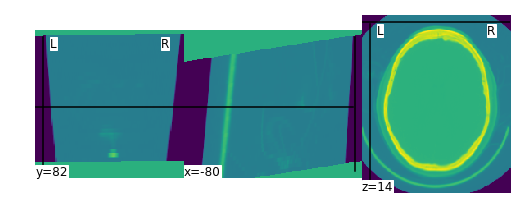

Plotting /data/illustration/py-out3/preprocessing/ID_0ead008d-ecef2edb6b_normalizedInverseWarped.nii.gz


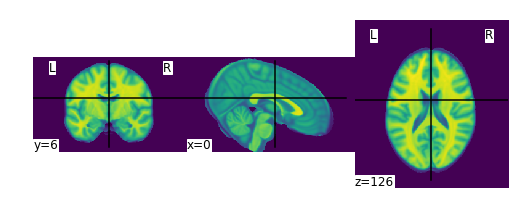

In [19]:
nii_files = glob(join(preprocessing_dir, "*.nii.gz"))

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plot_img(nii_file)
    plotting.show()

In [20]:
skull_strip_dir = join(output, 'brains')
skull_strip_args = [join(preprocessing_dir, '*_normalizedWarped.nii.gz'),
                    skull_strip_dir
                   ]
skull_strip(skull_strip_args)

2020-09-16 18:17:12,861 :: tbi.skull_strip :: INFO :: Arguments: Namespace(append='_brain', input='/data/illustration/py-out3/preprocessing/*_normalizedWarped.nii.gz', output='/data/illustration/py-out3/brains', strip='_normalizedWarped')
2020-09-16 18:17:12,971 :: tbi.skull_strip :: INFO :: Processing file /data/illustration/py-out3/preprocessing/ID_0ead008d-ecef2edb6b_normalizedWarped.nii.gz
2020-09-16 18:17:12,974 :: tbi.skull_strip :: INFO :: Using temp file /tmp/tmpa8802h96/temp.nii
2020-09-16 18:17:13,045 :: tbi.skull_strip :: INFO :: Rescaling image @ /data/illustration/py-out3/preprocessing/ID_0ead008d-ecef2edb6b_normalizedWarped.nii.gz
2020-09-16 18:17:14,173 :: tbi.skull_strip :: INFO :: Calibrating image @ /data/illustration/py-out3/preprocessing/ID_0ead008d-ecef2edb6b_normalizedWarped.nii.gz
2020-09-16 18:17:15,247 :: tbi.skull_strip :: INFO :: Using output /data/illustration/py-out3/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz
2020-09-16 18:17:15,250 :: tbi.utils :: INFO :: 

Plotting /data/illustration/py-out3/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz


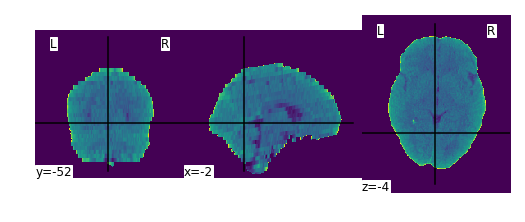

In [21]:
nii_files = glob(join(skull_strip_dir, "*.nii.gz"))

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plot_img(nii_file)
    plotting.show()

In [22]:
brains = join(skull_strip_dir, '*.nii.gz')
segmentation_dir = join(output, 'segmentation')
segmentation_args = ['-t', 
                     template_file, 
                     '-a', 
                     atlas_file, 
                     brains, 
                     segmentation_dir
                    ]

segmentation(segmentation_args)

2020-09-16 18:21:42,656 :: tbi.segmentation :: INFO :: Arguments: Namespace(atlas_file='illustration_data/New_atlas_cort_asym_sub.nii.gz', input='/data/illustration/py-out3/brains/*.nii.gz', output='/data/illustration/py-out3/segmentation', template_file='illustration_data/T_template0.nii.gz')
2020-09-16 18:21:42,683 :: tbi.segmentation :: INFO :: Processing /data/illustration/py-out3/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz
2020-09-16 18:21:42,727 :: tbi.segmentation :: INFO :: Registering /data/illustration/py-out3/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz
2020-09-16 18:21:42,755 :: tbi.utils :: INFO :: antsRegistrationSyNQuick.sh -d 3 -n 4 -f illustration_data/T_template0.nii.gz -m /data/illustration/py-out3/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz -o /data/illustration/py-out3/segmentation/REGIS/SyN/ID_0ead008d-ecef2edb6b_preprocessed_SyN
2020-09-16 18:25:28,497 :: tbi.utils :: INFO :: antsRegistrationSyNQuick.sh -d 3 -n 4 -f illustration_data/T_template0.nii.gz -m /data/illus

/data/illustration/py-out3/segmentation/SEG/PHYSCi/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.nii.gz


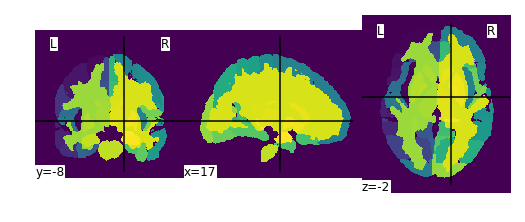

/data/illustration/py-out3/segmentation/SEG/AFFINE/ID_0ead008d-ecef2edb6b_segmentation_cortical_affine.nii.gz


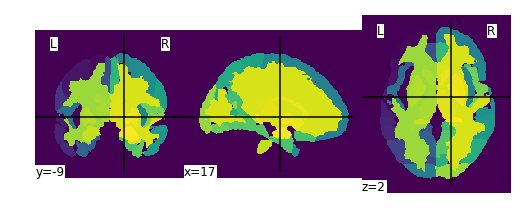

In [23]:
nii_files = glob(join(segmentation_dir, 'SEG/*/*.nii.gz'))
for nii_file in nii_files:
    print(nii_file)
    plot_img(nii_file)
    plotting.show()

In [24]:
label_geometry_measures_dir = join(output, 'label_geometry_measures')
label_geometry_measures_args = [join(segmentation_dir, 'SEG/*/*.nii.gz'),
                                label_geometry_measures_dir
                               ]

label_geometry_measures(label_geometry_measures_args)

2020-09-16 18:34:34,539 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/illustration/py-out3/segmentation/SEG/PHYSCi/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.nii.gz
2020-09-16 18:34:34,544 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/illustration/py-out3/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.txt
2020-09-16 18:34:34,547 :: tbi.utils :: INFO :: LabelGeometryMeasures 3 /data/illustration/py-out3/segmentation/SEG/PHYSCi/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.nii.gz > /data/illustration/py-out3/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.txt
2020-09-16 18:34:36,573 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/illustration/py-out3/segmentation/SEG/AFFINE/ID_0ead008d-ecef2edb6b_segmentation_cortical_affine.nii.gz
2020-09-16 18:34:36,575 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/illustration/py-out3/label_geometry_

In [25]:
txt_files = glob(join(label_geometry_measures_dir, "*.txt"))
names='Label,Volume(voxels),SurfArea(mm^2), Eccentricity, Elongation, Orientation,Centroid, Axes Length, Bounding Box'

for txt_file in txt_files:
    print('Displaying {0}'.format(txt_file))
    df = pd.read_csv(txt_file, 
        sep=r' {2,}', 
        engine='python', 
        index_col=0, skiprows=[0], header=None, names=names.split(','))
    display(df)

Displaying /data/illustration/py-out3/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_affine.txt


,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation,Orientation,Centroid,Axes Length,Bounding Box
Label,,,,,,,,
1,48988,12575.600,0.932525,2.76928,0.900586,"[115.209, 178.874, 79.8425]","[28.0149, 60.0069, 77.5812]","[90, 146, 160, 200, 43, 129]"
2,9950,3964.450,0.972224,4.27253,1.669010,"[127.621, 127.895, 72.595]","[13.393, 29.7878, 57.2218]","[118, 136, 97, 155, 53, 93]"
3,21126,7424.570,0.966250,3.88189,1.792260,"[103.642, 144.189, 129.081]","[20.7358, 32.2669, 80.4941]","[89, 119, 112, 183, 87, 151]"
4,19941,6063.880,0.945050,3.05881,1.344020,"[128.674, 143.955, 114.817]","[18.9604, 33.2442, 57.9963]","[113, 145, 119, 164, 89, 140]"
5,4725,2080.740,0.884185,2.14070,0.633920,"[140.768, 154.536, 81.2552]","[14.91, 18.5331, 31.9177]","[123, 148, 145, 163, 63, 98]"
...,...,...,...,...,...,...,...,...
111,6574,2320.320,0.945731,3.07738,1.163550,"[64.1561, 128.368, 72.5268]","[13.2436, 21.7605, 40.7558]","[56, 78, 105, 146, 60, 86]"
112,2127,976.792,0.931449,2.74822,1.014460,"[69.7311, 122.089, 71.2181]","[9.37566, 13.1683, 25.7664]","[61, 78, 109, 134, 65, 79]"
113,6119,2526.080,0.980730,5.11853,1.540390,"[63.3586, 106.013, 57.5723]","[9.76592, 24.0867, 49.9871]","[51, 80, 85, 123, 43, 79]"


Displaying /data/illustration/py-out3/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.txt


,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation,Orientation,Centroid,Axes Length,Bounding Box
Label,,,,,,,,
1,50937,12898.100,0.940885,2.95223,1.42529,"[110.909, 182.074, 77.3173]","[27.9302, 58.1925, 82.4564]","[85, 141, 161, 203, 38, 129]"
2,10199,4128.450,0.973323,4.35848,1.72734,"[125.438, 132.908, 65.7424]","[13.2931, 30.8252, 57.9379]","[114, 134, 100, 159, 46, 86]"
3,21821,7742.790,0.967612,3.96130,1.85312,"[103.909, 142.37, 127.859]","[20.9496, 32.0404, 82.9876]","[87, 121, 108, 182, 86, 150]"
4,20966,6281.690,0.948794,3.16559,1.44701,"[127.665, 145.416, 111.429]","[19.2276, 32.8889, 60.8668]","[110, 144, 119, 168, 85, 138]"
5,5061,2178.660,0.902526,2.32215,1.14139,"[137.351, 159.669, 75.9131]","[14.7064, 18.4181, 34.1505]","[120, 145, 150, 169, 57, 94]"
...,...,...,...,...,...,...,...,...
111,6660,2390.650,0.949981,3.20197,1.25190,"[63.6812, 128.473, 68.7194]","[12.992, 22.4435, 41.5998]","[56, 76, 105, 147, 56, 83]"
112,2191,1030.110,0.932879,2.77630,1.09530,"[69.2812, 123.074, 66.6919]","[9.33448, 13.6578, 25.9154]","[62, 77, 110, 136, 59, 75]"
113,6208,2585.920,0.982268,5.33389,1.63956,"[63.3462, 107.553, 51.8151]","[9.80213, 23.3256, 52.2835]","[52, 82, 86, 126, 37, 73]"


In [26]:
image_intensity_stat_jac_dir = join(output, 'image_intensity_stat_jac')
image_intensity_stat_jac_args = ['-a',
                                 atlas_file,
                                 join(segmentation_dir, 'REGIS/Affine2SyN/*affine2Syn1Warp.nii.gz'), 
                                 image_intensity_stat_jac_dir
                                ]

image_intensity_stat_jac(image_intensity_stat_jac_args)

2020-09-16 18:34:59,301 :: tbi.image_intensity_stat_jac :: INFO :: Processing file name:  /data/illustration/py-out3/segmentation/REGIS/Affine2SyN/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.nii.gz
2020-09-16 18:34:59,302 :: tbi.image_intensity_stat_jac :: INFO :: Saving to file name: /data/illustration/py-out3/image_intensity_stat_jac/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.txt
2020-09-16 18:34:59,304 :: tbi.utils :: INFO :: ImageIntensityStatistics 3 /data/illustration/py-out3/segmentation/REGIS/Affine2SyN/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.nii.gz illustration_data/New_atlas_cort_asym_sub.nii.gz > /data/illustration/py-out3/image_intensity_stat_jac/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.txt
2020-09-16 18:35:03,713 :: tbi.image_intensity_stat_jac :: INFO :: Done


In [27]:
txt_files = glob(join(image_intensity_stat_jac_dir, "*.txt"))
names='Label,Volume(voxels),SurfArea(mm^2), Eccentricity, Elongation, Orientation,Centroid, Axes Length, Bounding Box'

for txt_file in txt_files:
    print('Displaying {0}'.format(txt_file))
    df = pd.read_csv(txt_file, sep=' +', engine='python', index_col=0)
    display(df)

Displaying /data/illustration/py-out3/image_intensity_stat_jac/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.txt


,Mean,Sigma,Skewness,Kurtosis,Entropy,Sum,5th%,95th%,Min,Max
Label,,,,,,,,,,
1,-0.197813,0.444937,-0.056199,4.34521,5.90919,-9996.280,-0.969012,0.517612,-1.414640,0.803109
2,-0.487664,0.291316,-0.011282,-93.29780,5.31795,-4896.640,-0.968062,-0.007678,-1.192310,0.186101
3,0.058083,0.115684,0.325648,-837.83900,3.99532,1239.370,-0.111365,0.278445,-0.391922,0.442610
4,0.161060,0.096092,0.264278,-485.24200,3.68654,3309.470,0.035315,0.331335,-0.152481,0.416138
5,-0.269844,0.148420,0.679463,364.97400,4.23197,-1336.270,-0.461526,0.020996,-0.641964,0.168189
...,...,...,...,...,...,...,...,...,...,...
111,-0.632370,0.164953,0.279226,160.13300,4.46302,-4045.270,-0.882296,-0.339510,-1.069890,-0.218105
112,-0.681866,0.092730,1.047110,-29.38880,3.40810,-1444.190,-0.789368,-0.484160,-0.810851,-0.376936
113,-1.014540,0.349577,0.798410,514.69100,5.44083,-5770.710,-1.465970,-0.275631,-1.710240,-0.051199
